In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from IPython.display import display
sb.set() # set the default Seaborn style for graphics

# PROBLEM STATEMENT:

# Most important variable in retaining high Customer Life Value (CLV) customers

## Importing Datasets

In [2]:
customerdata = pd.read_csv("olist_customers_dataset.csv")
orderitems = pd.read_csv("olist_order_items_dataset.csv")
orderpayments = pd.read_csv("olist_order_payments_dataset.csv")
orderreviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
translation = pd.read_csv("product_category_name_translation.csv")
datasetlist = [orderitems,orderpayments,orderreviews,orders,products,translation]

## Basic Data Exploration

In [3]:
for x in datasetlist:
    x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 

## Checking for Discrepancies

In [4]:
print(len(orderitems.order_id.unique()))
print(len(orders.order_id.unique()))
print(len(orderpayments.order_id.unique()))
print(len(orderreviews.order_id.unique()))

98666
99441
99440
99441


### Missing values of order_id found between the datasets. Filter out the missing values and find out the reason why they are dropped between datasets. 

In [5]:
#Finding list of missing order_id
missinglist = []
testset = set(orderitems.order_id)
for x in orders.order_id:
    if x in testset:
        continue
    else:
        missinglist.append(x)
        

#Extracting missing data from orders dataset
missingdf = pd.DataFrame
missingdf = orders[orders['order_id'].isin(missinglist)]
missingdf.info()
missingdf

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 266 to 99415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       775 non-null    object
 1   customer_id                    775 non-null    object
 2   order_status                   775 non-null    object
 3   order_purchase_timestamp       775 non-null    object
 4   order_approved_at              629 non-null    object
 5   order_delivered_carrier_date   1 non-null      object
 6   order_delivered_customer_date  0 non-null      object
 7   order_estimated_delivery_date  775 non-null    object
dtypes: object(8)
memory usage: 54.5+ KB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


### Missing order_ids found to be cancelled / unsuccessful orders. As such, we will drop these orders from all datasets.

In [6]:
neworders = orders[~orders.order_id.isin(missinglist)]
neworderpayments = orderpayments[~orderpayments.order_id.isin(missinglist)]
neworderreviews = orderreviews[~orderreviews.order_id.isin(missinglist)]

print(len(orderitems.order_id.unique()))
print(len(neworders.order_id.unique()))
print(len(neworderpayments.order_id.unique()))
print(len(neworderreviews.order_id.unique()))

98666
98666
98665
98666


### There is still one missing value in order payments. Let's find out

In [7]:
missinglist = []
testset = set(neworderpayments.order_id)
for x in orderitems.order_id:
    if x in testset:
        continue
    else:
        missinglist.append(x)

#Extracting missing data from orders dataset
missingdf = pd.DataFrame
missingdf = neworderreviews[neworderreviews['order_id'].isin(missinglist)]
missingdf

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
37828,6916ca4502d6d3bfd39818759d55d536,bfbd0f9bdef84302105ad712db648a6c,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28


##### "nao recebi o produto e nem resposta da empresa" =  I did not receive the product and no response from the company
##### So we will drop this order_id as well

##### Seems to have some missing values in delivery date under orders dataset as well

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Presence of NA values in column 5 and 6. As such, we will drop those too.

In [9]:
x = orders[orders['order_delivered_customer_date'].isna()]
a = x.order_id.tolist()
y = orders[orders['order_delivered_carrier_date'].isna()]
b = x.order_id.tolist()
z = orders[orders['order_approved_at'].isna()]
c = x.order_id.tolist()
d = a+b+c+missinglist
miss = set(d)
len(miss)

2966

In [10]:
newerorders = neworders[~neworders.order_id.isin(miss)]
newerorderpayments = neworderpayments[~neworderpayments.order_id.isin(miss)]
newerorderreviews = neworderreviews[~neworderreviews.order_id.isin(miss)]
newerorderitems = orderitems[~orderitems.order_id.isin(miss)]

print(len(newerorderitems.order_id.unique()))
print(len(newerorders.order_id.unique()))
print(len(newerorderpayments.order_id.unique()))
print(len(newerorderreviews.order_id.unique()))

newerorders[newerorders["order_delivered_customer_date"].isna()]

96475
96475
96475
96475


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


## Here we will create a new column "delivery_time" based on the order date and delivery date. We will use this variable in our decision tree later

In [11]:
from datetime import date
 
def numOfDays(date1, date2):
    return (date2-date1).days

datexy = newerorders[["order_id","order_purchase_timestamp","order_delivered_customer_date"]]
datexy.reset_index(inplace=True)
datex=newerorders.order_purchase_timestamp
datey=newerorders.order_delivered_customer_date


In [12]:
delivery_days = []
datexy['delivery_time'] = np.nan
for x in range(96475):
    year1=datexy.loc[x]["order_purchase_timestamp"][:4]
    month1=datexy.loc[x]["order_purchase_timestamp"][5:7]
    day1=datexy.loc[x]["order_purchase_timestamp"][8:10]
    year2=datexy.loc[x]["order_delivered_customer_date"][:4]
    month2=datexy.loc[x]["order_delivered_customer_date"][5:7]
    day2=datexy.loc[x]["order_delivered_customer_date"][8:10]
    date1 =date(int(year1),int(month1),int(day1))
    date2 =date(int(year2),int(month2),int(day2))
    if numOfDays(date1,date2)!=0:
        #delivery_days.append(numOfDays(date1, date2))
        datexy.loc[x, "delivery_time"] = numOfDays(date1, date2)
        #print(numOfDays(date1,date2))


<ipython-input-12-5ba6dad57ea9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datexy['delivery_time'] = np.nan
C:\Users\Justyn\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
newerorders = pd.merge(newerorders,datexy[['order_id','delivery_time']],on='order_id', how='left')

### Now we will concat these dataframes together

In [14]:
newerorderitems.info()
newerorders.info()
newerorderpayments.info()
newerorderreviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110193 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             110193 non-null  object 
 1   order_item_id        110193 non-null  int64  
 2   product_id           110193 non-null  object 
 3   seller_id            110193 non-null  object 
 4   shipping_limit_date  110193 non-null  object 
 5   price                110193 non-null  float64
 6   freight_value        110193 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96475 entries, 0 to 96474
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96475 non-null  object 
 1   customer_id                    96475 non-null  object 
 2   order_status    

In [15]:
new = pd.merge(newerorderitems, newerorderpayments, on='order_id')
new1 = pd.merge(new, newerorderreviews, on='order_id')
new2 = pd.merge(new1, newerorders, on='order_id')
completedata = pd.merge(new2, products, on='product_id')

# translate category names to english
translate = translation.set_index('product_category_name').to_dict()['product_category_name_english']

completedata['product_category_name'].replace(translate, inplace=True)

print(completedata["product_category_name"])

0              cool_stuff
1              cool_stuff
2              cool_stuff
3              cool_stuff
4              cool_stuff
               ...       
115722       garden_tools
115723    furniture_decor
115724      watches_gifts
115725     sports_leisure
115726     bed_bath_table
Name: product_category_name, Length: 115727, dtype: object


In [16]:
completedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115727 entries, 0 to 115726
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115727 non-null  object 
 1   order_item_id                  115727 non-null  int64  
 2   product_id                     115727 non-null  object 
 3   seller_id                      115727 non-null  object 
 4   shipping_limit_date            115727 non-null  object 
 5   price                          115727 non-null  float64
 6   freight_value                  115727 non-null  float64
 7   payment_sequential             115727 non-null  int64  
 8   payment_type                   115727 non-null  object 
 9   payment_installments           115727 non-null  int64  
 10  payment_value                  115727 non-null  float64
 11  review_id                      115727 non-null  object 
 12  review_score                  

## Still have some null values in product category, description, etc. We will drop all these rows.

In [17]:
finaldata = completedata.dropna(subset = ['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','delivery_time'])
finaldata["product_category_name"] = finaldata["product_category_name"].astype('category')
finaldata["product_category_name"] = finaldata["product_category_name"].cat.codes
finaldata.info()

<ipython-input-17-c7f2777c29ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata["product_category_name"] = finaldata["product_category_name"].astype('category')
<ipython-input-17-c7f2777c29ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata["product_category_name"] = finaldata["product_category_name"].cat.codes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 114087 entries, 0 to 115726
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114087 non-null  object 
 1   order_item_id                  114087 non-null  int64  
 2   product_id                     114087 non-null  object 
 3   seller_id                      114087 non-null  object 
 4   shipping_limit_date            114087 non-null  object 
 5   price                          114087 non-null  float64
 6   freight_value                  114087 non-null  float64
 7   payment_sequential             114087 non-null  int64  
 8   payment_type                   114087 non-null  object 
 9   payment_installments           114087 non-null  int64  
 10  payment_value                  114087 non-null  float64
 11  review_id                      114087 non-null  object 
 12  review_score                  

In [18]:
dateab = completedata[["review_id","review_creation_date","review_answer_timestamp"]]
dateab.reset_index(inplace=True)
datea=completedata.review_creation_date
dateb=completedata.review_answer_timestamp
review_response_days = []
dateab['review_response_days'] = np.nan
for x in range(115726):
    yeara=dateab.loc[x]["review_creation_date"][:4]
    montha=dateab.loc[x]["review_creation_date"][5:7]
    daya=dateab.loc[x]["review_creation_date"][8:10]
    yearb=dateab.loc[x]["review_answer_timestamp"][:4]
    monthb=dateab.loc[x]["review_answer_timestamp"][5:7]
    dayb=dateab.loc[x]["review_answer_timestamp"][8:10]
    dateA =date(int(yeara),int(montha),int(daya))
    dateB =date(int(yearb),int(monthb),int(dayb))
    if numOfDays(dateA,dateB)!=0:
        #delivery_days.append(numOfDays(date1, date2))
        dateab.loc[x, "review_response_days"] = numOfDays(dateA, dateB)
        #print(numOfDays(dateA,dateB))
finaldata = pd.merge(completedata,dateab[['review_id','review_response_days']],on='review_id')

<ipython-input-18-05a39d9a85e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateab['review_response_days'] = np.nan


In [19]:
finaldata.info()
finaldata.to_csv("finaldata.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192761 entries, 0 to 192760
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       192761 non-null  object 
 1   order_item_id                  192761 non-null  int64  
 2   product_id                     192761 non-null  object 
 3   seller_id                      192761 non-null  object 
 4   shipping_limit_date            192761 non-null  object 
 5   price                          192761 non-null  float64
 6   freight_value                  192761 non-null  float64
 7   payment_sequential             192761 non-null  int64  
 8   payment_type                   192761 non-null  object 
 9   payment_installments           192761 non-null  int64  
 10  payment_value                  192761 non-null  float64
 11  review_id                      192761 non-null  object 
 12  review_score                  

### Now we are left with null values only present in the review title and message. We will not be dropping these values

# Calculation of Retention Rates:
### If a customer orders more than once, we will assume that the customer is a "retained customer"
### We will then use a few predictors to determine which variable is most important that impacts the categorical Yes/No of Churn.

In [20]:
len(finaldata.customer_id.unique())
len(customerdata.customer_unique_id.unique())

96096

"At our system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store." 
### We would need to add a new column, customerunique_id to the orders dataset to identify repeat customers

In [21]:
customer_translate = customerdata.set_index('customer_id').to_dict()['customer_unique_id']
#finaldata['customer_unique_id'] = finaldata['customer_id'].map(customer_translate)

finaldata['customer_unique_id'] = finaldata.customer_id.map(customer_translate)
len(finaldata.customer_unique_id.unique())
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192761 entries, 0 to 192760
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       192761 non-null  object 
 1   order_item_id                  192761 non-null  int64  
 2   product_id                     192761 non-null  object 
 3   seller_id                      192761 non-null  object 
 4   shipping_limit_date            192761 non-null  object 
 5   price                          192761 non-null  float64
 6   freight_value                  192761 non-null  float64
 7   payment_sequential             192761 non-null  int64  
 8   payment_type                   192761 non-null  object 
 9   payment_installments           192761 non-null  int64  
 10  payment_value                  192761 non-null  float64
 11  review_id                      192761 non-null  object 
 12  review_score                  

In [22]:
explore = finaldata[['customer_id','customer_unique_id']]
explore.sort_values(by=['customer_unique_id'])

,customer_id,customer_unique_id
33053,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2
127697,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f
138980,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064
135066,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078
186098,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255
...,...,...
158135,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684
62712,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061
153579,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a
34014,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48


### Extracting rows where unique customer id can be mapped to at least 2 different customer ids  

In [23]:
retain = explore.drop_duplicates(subset =['customer_id'])
retainlist = retain.customer_unique_id.value_counts()
retainedcustomers = retain[retain.customer_unique_id.isin(retainlist.index[retainlist.ge(2)])]
retainedcustomers

,customer_id,customer_unique_id
20,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051
101,0bc91e14cb93aab1b6f6730922a31aad,c2a444c39a2d87b50039f910db917e3d
156,1e248ce64cdbfc9d30332ff380eef1ab,f62d6572c9c25b3796d058d7b833f8b7
179,d3ab89d9a1a9f356e6da0f519d0bf68e,213b36024bb0b8261de0ffbd652ebc34
240,1ba27dd3d21d68e40a49916af05cafef,59bba92de9b8f6be0808e4d9d64b4b43
...,...,...
191039,3b11d54278a86bfa191ef947e654c9cb,cef42836ff25476d55c9a3e58f8da99d
192674,86f759cadfc423887480182ca9589e39,455c17b35969ca198c17f2fc9e8eba1b
192678,9c358be1d13efdf63bdffaad35834115,85ed7212fe192ab02ab44c95ba87868e
192727,069dca5337f1cf3f778d0cfa43ce8dd9,c130bf40aa6d3bdb444b04a8d78adf5a


### Making of list of unique customer ids that have ordered > once.

In [24]:
retaineduniqueid = retainedcustomers.customer_unique_id.unique().tolist()
len(retaineduniqueid)

2801

### Adding a 'retained' column to finaldata

In [25]:
finaldata['retained'] = np.where(finaldata['customer_unique_id'].isin(retaineduniqueid), True, False)
finaldata


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_response_days,customer_unique_id,retained
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,871766c5855e863f6eccc05f988b23cb,False
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1,boleto,1,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3.0,0fb8e3eab2d3e79d92bb3fffbb97f188,False
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1,credit_card,2,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,3419052c8c6b45daf79c1e426f9e9bcb,False
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1,credit_card,3,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3.0,e7c828d22c0682c1565252deefbe334d,False
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1,credit_card,4,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3.0,0bb98ba72dcc08e95f9d8cc434e9a2cc,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192756,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,1,credit_card,1,...,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,1.0,a1c2e4b4c1b29e41684ebdf3cc6538f8,False
192757,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,1,credit_card,2,...,30.0,308.0,1.0,2300.0,37.0,30.0,20.0,3.0,4e15fee963523774998876e3624952f4,True
192758,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,1,credit_card,1,...,33.0,658.0,3.0,400.0,19.0,9.0,15.0,3.0,c86ab5ff2bac777c4e770a383feca4eb,False
192759,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,1,credit_card,7,...,32.0,280.0,2.0,2700.0,60.0,15.0,15.0,2.0,2a3ab9bf9639491997586882c502540a,False


### As you can see, those customers with retained = True have customer_unique_id mapped to at least 2 different customer_id

In [32]:
explore = finaldata[finaldata['retained'] == True]
explore1 = explore[['customer_id','customer_unique_id','retained','order_purchase_timestamp','price']]
explore1.sort_values(by=['customer_unique_id'])

,customer_id,customer_unique_id,retained,order_purchase_timestamp,price
42563,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,True,2017-07-27 14:13:03,229.99
61726,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,True,2018-01-14 07:36:54,87.90
52451,cbb68c721ba9ddb30d8a490cc1897fa1,00a39521eb40f7012db50455bf083460,True,2018-06-03 10:12:57,11.55
66659,876356df457f952458a764348e1858bc,00a39521eb40f7012db50455bf083460,True,2018-05-23 20:14:21,69.90
155333,102fc0966044243157bb81e4ee0a251e,00cc12a6d8b578b8ebd21ea4e2ae8b27,True,2017-03-21 19:25:23,69.90
...,...,...,...,...,...
190882,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,True,2017-02-22 12:26:42,24.90
143335,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,True,2017-08-23 13:15:29,40.00
86918,bec0bf00ac5bee64ce8ef5283051a70c,ff922bdd6bafcdf99cb90d7f39cea5b3,True,2017-09-14 14:24:04,29.89
104244,0088395699ea0fcd459bfbef084997db,ffe254cc039740e17dd15a5305035928,True,2017-04-02 16:33:30,13.90


In [35]:
explore1.to_csv("CLVdata.csv")

# Exploratory Analysis
### Perform statistical exploration and visualization on the retained dataframe

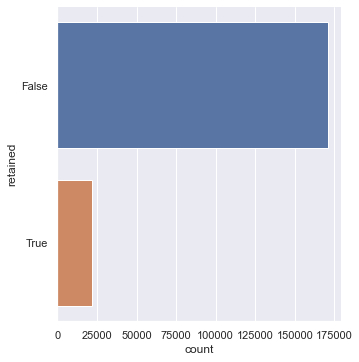

In [27]:
sb.catplot(y = 'retained', data = finaldata, kind = "count")

In [28]:
countY, countX = finaldata.retained.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)
print("Large imbalance between the classes")

Ratio of classes is Y : N =  170874 : 21887
Large imbalance between the classes


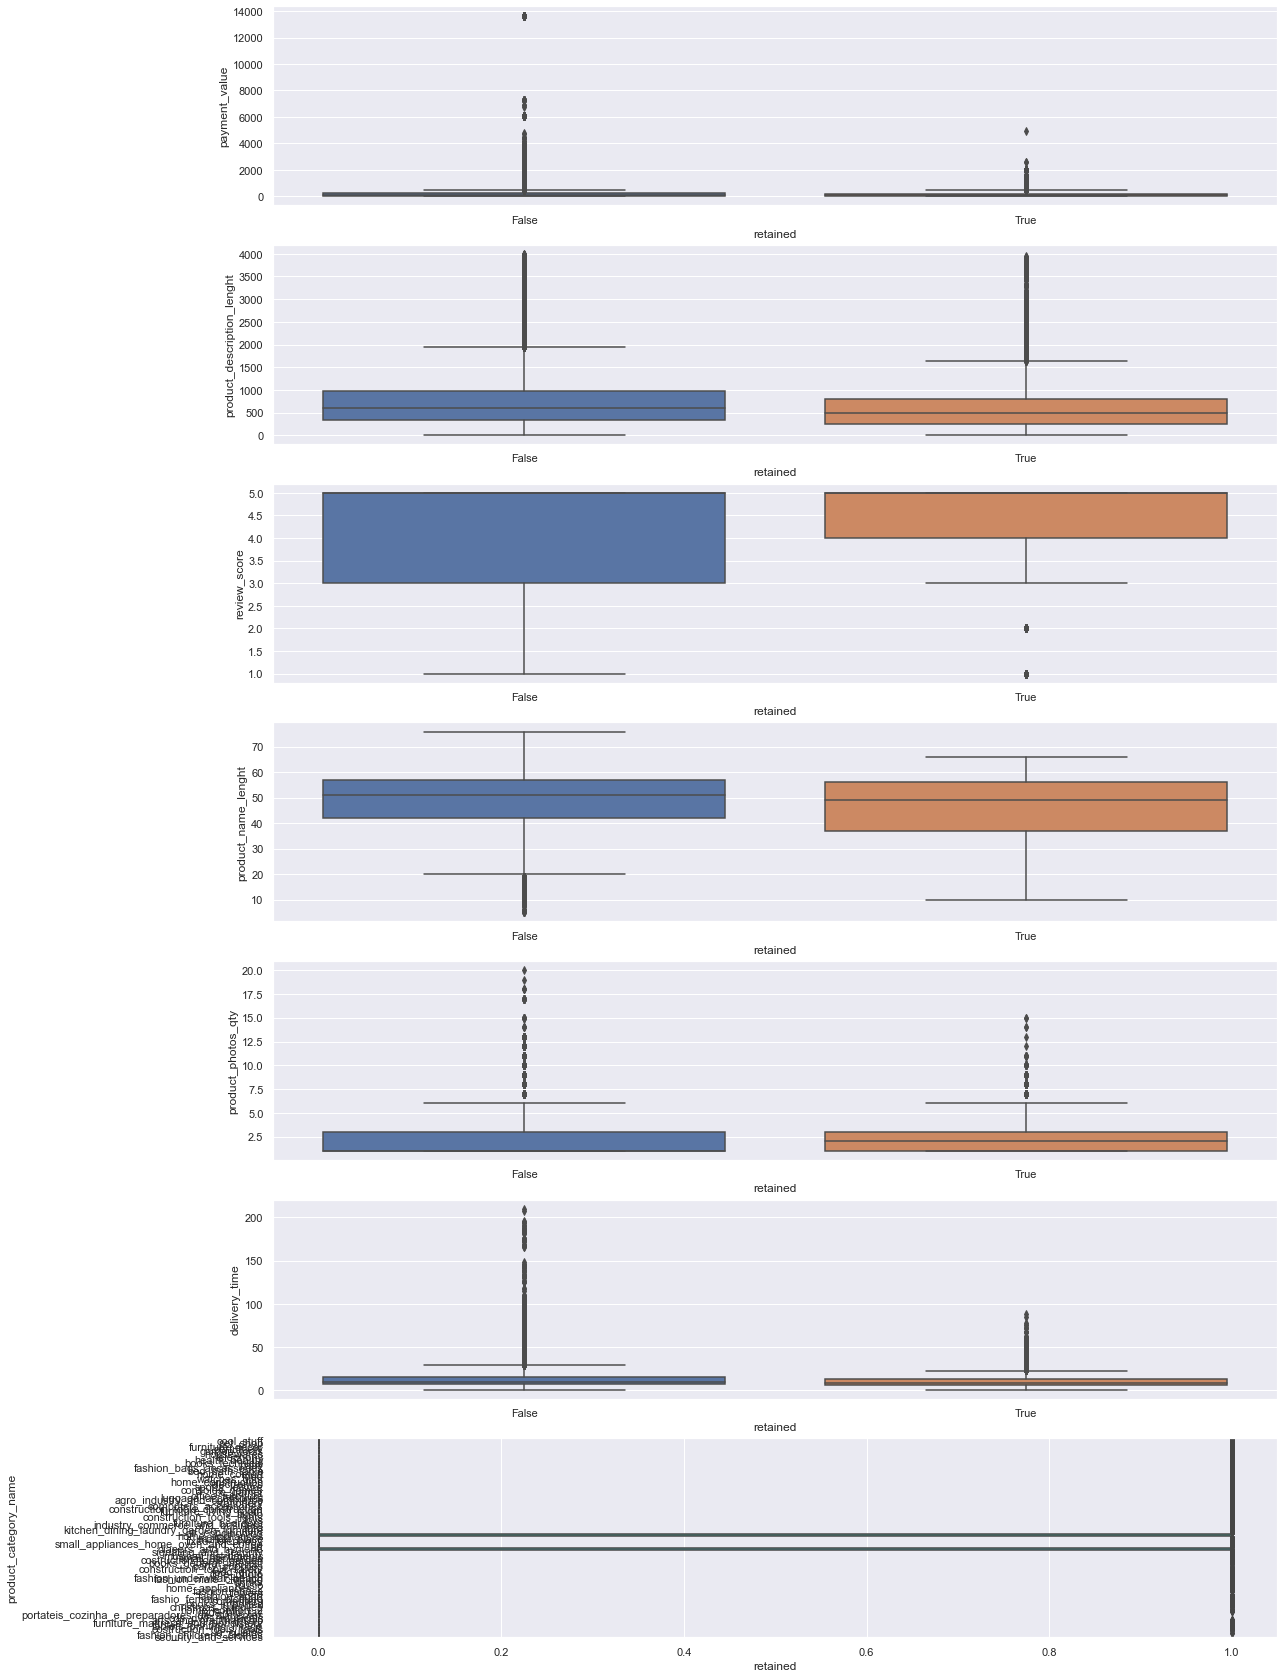

In [29]:
#f = plt.figure(figsize=(16, 8))
l= ['payment_value','product_description_lenght','review_score','product_name_lenght','product_photos_qty','delivery_time','product_category_name']
f, axes = plt.subplots(7, 1, figsize=(18, 30))
count = 0
for a in l:
    sb.boxplot(y = a, x = 'retained', data = finaldata,ax=axes[count])
    count+=1

## Lets create a classification tree to find which variable is most important in impacting the Churn (retained = True/False) of a customer

In [30]:
# Extract Response and Predictors
y = pd.DataFrame(finaldata['retained'])
X = pd.DataFrame(finaldata[['product_category_name','payment_value','product_description_lenght','review_score','product_name_lenght','product_photos_qty','delivery_time']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model


f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["False","True"])

ValueError: could not convert string to float: 'bed_bath_table'

## Accuracy measures for train dataset

In [ ]:

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Accuracy measures for test dataset

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Customer Lifetime Value (CLV)
## Problem statement #1: Predicting the CLV of recurring (retained=True) customers 
### Steps:
### 1. Filter out recurring customers from data
### 2. Calculate CLV = Avg Indv Sale * (Retention Period / Frequency of Purchase) * Profit Margin
### 3. Create and fit multi-variate regression model
## Problem statement #2: Finding which variable is most important for CLV
### Steps:
### 1. Clustering into 3 segments; high-med-low CLV
### 2. Create and fit multi-variate decision tree

In [ ]:
finaldata.info()

In [ ]:
# Filter retained customers
clvfilter = finaldata[finaldata['retained'] == True]
    
# Frequency of purchase; per month basis
clvdata = clvfilter['customer_unique_id'].value_counts().to_frame(name="No.Orders")
clvdata['frequency'] = clvdata['No.Orders'].div(24)

# Avg indiv sale
total = clvfilter.groupby('customer_unique_id')['payment_value'].sum()
clvdata['avg sale'] = total/clvdata['No.Orders']

# CLV: Profit margin of 10% and retention period of 18 months
clvdata['CLV'] = clvdata['frequency']*clvdata['avg sale']*0.1*18

clvdata['delivery_time']=clvfilter.groupby('customer_unique_id')['delivery_time'].sum() / clvdata['No.Orders']
clvdata['review_score']=clvfilter.groupby('customer_unique_id')['review_score'].sum() / clvdata['No.Orders']
clvdata